In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
import datetime
import math
import calendar
import sys
sys.path.append('../')
from scripts.data_loader  import split_date
from scripts.missing_info import MissingValue
from scripts.ploting import Plots
from scripts.Clean_data import  DataCleaner
miss_val = MissingValue()
cleaner=DataCleaner()

In [130]:
train = pd.read_csv('../data/train.csv',low_memory=False)
test = pd.read_csv('../data/test.csv',low_memory=False)
store = pd.read_csv('../data/store.csv',low_memory=False)

train.shape, test.shape, store.shape

((1017209, 9), (41088, 8), (1115, 10))

Encode the Data

In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

target = ['Sales']
numeric_col = ['Customers', 'Open', 'Promo', 'Promo2', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance']
categorical_col = ['DayOfWeek', 'Quarter', 'Month', 'Year', 'StoreType', 'Assortment', 'Season']

def create_encode(df, col):
    le = LabelEncoder()
    a = le.fit_transform(data[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    col_names = [col+ "_" + str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a), columns = col_names))

In [132]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [133]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [134]:
test.shape

(41088, 8)

Normalize the data

<b>`Feature Engineering and Preprocessing`<b>

In [135]:
features_x = ['Store', 'Date', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday']
features_y = ['SalesLog']

In [136]:
train['is_train'] = 1
test['is_train'] = 0
df = pd.concat([train, test])

In [137]:
df.Date = pd.to_datetime(df.Date) #Converting date to required format

In [138]:
df = df.loc[~((df['Open'] == 1) & (df['Sales'] == 0))] #Removing rows with Sales 0
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,is_train,Id
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,1,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,1,NaN
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,1,NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,1,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,41084.0
41084,1112,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,41085.0
41085,1113,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,41086.0
41086,1114,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,41087.0


In [139]:
df.StateHoliday = df.StateHoliday.map({0:'0', 'a':'a', 'b':'b', 'c':'c', '0':'0'}) #mixed data types
df.StateHoliday = LabelEncoder().fit_transform(df.StateHoliday) #Encoding for XG Boost

In [140]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,is_train,Id
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,1,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,1,NaN
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,1,NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,1,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,41084.0
41084,1112,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,41085.0
41085,1113,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,41086.0
41086,1114,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,41087.0


In [141]:
split_date(df)

In [142]:
df['Is Weekend'].replace({False: 0, True: 1}, inplace=True)
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                   float64
Customers               float64
Open                    float64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
is_train                  int64
Id                      float64
Year                      int64
Month                     int64
Day                       int64
WeekOfYear               UInt32
Day of Week               int64
Is Weekend                int64
dtype: object

In [143]:
store.StoreType = LabelEncoder().fit_transform(store.StoreType) #encoding StoreType
store.Assortment = LabelEncoder().fit_transform(store.Assortment) #encoding Assortment

In [144]:
join_with = store['PromoInterval'].str.split(',').apply(pd.Series)
join_with.columns = join_with.columns.map(lambda x: str(x) + '_PromoInterval')
store = store.join(join_with) #joining splits

In [145]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,0_PromoInterval,1_PromoInterval,2_PromoInterval,3_PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jan,Apr,Jul,Oct
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jan,Apr,Jul,Oct
3,4,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Jan,Apr,Jul,Oct
1111,1112,2,2,1880.0,4.0,2006.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,1113,0,2,9260.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,1114,0,2,870.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
def monthToNum(value):
    if(value=='Sept'):
        value='Sep'
    return list(calendar.month_abbr).index(value)
#mapping month abbr to month number
store['0_PromoInterval'] = store['0_PromoInterval'].map(
    lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
store['1_PromoInterval'] = store['1_PromoInterval'].map(
    lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
store['2_PromoInterval'] = store['2_PromoInterval'].map(
    lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
store['3_PromoInterval'] = store['3_PromoInterval'].map(
    lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)

In [147]:
competition_open = []
for index, value in store[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].iterrows():
    try:
        year, month = int(value['CompetitionOpenSinceYear']), int(value['CompetitionOpenSinceMonth'])
        date = pd.to_datetime("{}-{}-01".format(year, month), format='%Y-%m')
        competition_open.append(date)
    except:
        competition_open.append(np.nan)
competition_open = pd.Series(competition_open)
competition_open.shape

(1115,)

In [148]:
store[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,9.0,2008.0
1,11.0,2007.0
2,12.0,2006.0
3,9.0,2009.0
4,4.0,2015.0
...,...,...
1110,6.0,2014.0
1111,4.0,2006.0
1112,NaN,NaN
1113,NaN,NaN


In [149]:
store['CompetitionOpen'] = competition_open #converted int to datetime
store['CompetitionOpen'] = store.CompetitionOpen.dt.strftime('%Y%m%d')

In [150]:
promo = []
for index, value in store[['Promo2SinceWeek', 'Promo2SinceYear']].iterrows():
    try:
        year, week = int(value['Promo2SinceYear']), int(value['Promo2SinceWeek'])
        date = pd.to_datetime("{}-{}-01".format(year, week), format='%Y%W')
        promo.append(date)
    except:
        promo.append(np.nan)
promo = pd.to_datetime(pd.Series(competition_open))
promo.shape

(1115,)

In [151]:
store['PromoSince'] = promo #converted int to datetime
store['PromoSince'] = store.PromoSince.dt.strftime('%Y%m%d')

In [152]:
store_features = ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
                  'PromoSince', '0_PromoInterval']
#1_PromoInterval, 2_PromoInterval, 3_PromoInterval irrelevent

In [153]:
df = pd.merge(df, store[store_features], how='left', on=['Store'])

In [154]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,is_train,...,Day,WeekOfYear,Day of Week,Is Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpen,PromoSince,0_PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,1,...,31,31,4,0,2,0,1270.0,20080901,20080901,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,1,...,31,31,4,0,0,0,570.0,20071101,20071101,1.0
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,1,...,31,31,4,0,0,0,14130.0,20061201,20061201,1.0
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,1,...,31,31,4,0,2,2,620.0,20090901,20090901,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,1,...,31,31,4,0,0,0,29910.0,20150401,20150401,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058238,1111,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,...,1,31,5,1,0,0,1900.0,20140601,20140601,1.0
1058239,1112,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,...,1,31,5,1,2,2,1880.0,20060401,20060401,NaN
1058240,1113,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,...,1,31,5,1,0,2,9260.0,NaN,NaN,NaN
1058241,1114,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,...,1,31,5,1,0,2,870.0,NaN,NaN,NaN


In [155]:
features_x = list(set(features_x + store_features))
features_x

['CompetitionOpen',
 'PromoSince',
 'Date',
 'Store',
 'StoreType',
 'SchoolHoliday',
 '0_PromoInterval',
 'StateHoliday',
 'Promo',
 'DayOfWeek',
 'CompetitionDistance',
 'Assortment',
 'Open']

In [156]:
for feature in features_x:
    df[feature] = df[feature].fillna(-999) #out of range value for model

In [157]:
df['DateInt'] = df.Date.dt.strftime('%Y%m%d').map(int) #mapping to Int
df['CompetitionOpen'] = df.CompetitionOpen.map(int)
df['PromoSince'] = df.PromoSince.map(int)

In [158]:
df['Zscore'] = (df.Sales - df.Sales.mean())/df.Sales.std()

In [159]:
thresh=4.0
def check_outlier(value):
    if(value>=thresh):
        return True
    else:
        return False

df['Outlier'] = df.Zscore.apply(check_outlier)

<AxesSubplot:>

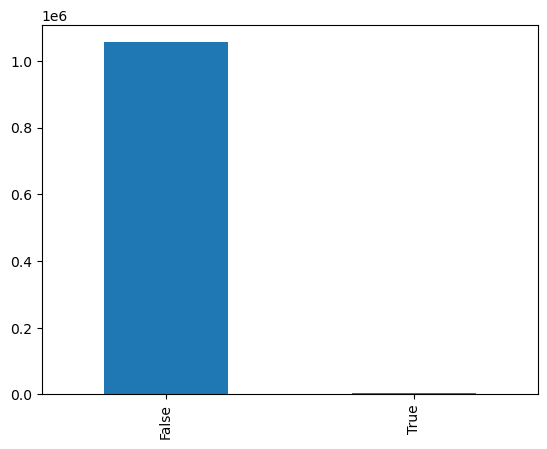

In [160]:
df['Outlier'].value_counts().plot(kind='bar')

In [161]:
store_data_sales = df.groupby([df['Store']])['Sales'].sum()
store_data_customers = df.groupby([df['Store']])['Customers'].sum()
store_data_open = df.groupby([df['Store']])['Open'].count()

store_data_sales_per_day = store_data_sales / store_data_open
store_data_customers_per_day = store_data_customers / store_data_open
store_data_sales_per_customer_per_day = store_data_sales_per_day / store_data_customers_per_day

df_store = pd.merge(store, 
        store_data_sales_per_day.reset_index(name='SalesPerDay'), how='left', on=['Store'])
df_store = pd.merge(df_store, 
        store_data_customers_per_day.reset_index(name='CustomersPerDay'), how='left', on=['Store'])
df_store = pd.merge(df_store, 
store_data_sales_per_customer_per_day.reset_index(name='SalesPerCustomersPerDay'), how='left', 
                                            on=['Store'])

In [162]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,0_PromoInterval,1_PromoInterval,2_PromoInterval,3_PromoInterval,CompetitionOpen,PromoSince,SalesPerDay,CustomersPerDay,SalesPerCustomersPerDay
0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20080901,20080901,3754.397980,444.972727,8.437366
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1.0,4.0,7.0,10.0,20071101,20071101,4122.991507,486.045648,8.482725
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.0,4.0,7.0,10.0,20061201,20061201,5462.889899,590.212121,9.255808
3,4,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20090901,20090901,8021.769639,1100.057325,7.292138
4,5,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150401,20150401,3867.110403,444.360934,8.702634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,0,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1.0,4.0,7.0,10.0,20140601,20140601,4132.400000,355.437374,11.626239
1111,1112,2,2,1880.0,4.0,2006.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20060401,20060401,8054.842424,659.874747,12.206623
1112,1113,0,2,9260.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5248.729293,567.829293,9.243499
1113,1114,0,2,870.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16366.247475,2534.890909,6.456391


In [163]:
store_features = ['Store', 'SalesPerDay', 'CustomersPerDay', 'SalesPerCustomersPerDay']

features_x = list(set(features_x + store_features))
df = pd.merge(df, df_store[store_features], how='left', on=['Store'])

In [164]:
holidays_each_day_of_week = df.groupby(df.DayOfWeek).sum().StateHoliday
df = pd.merge(df, holidays_each_day_of_week.reset_index(name='HolidaysPerDayOfWeek'), on=['DayOfWeek'])

In [165]:
school_holidays_each_day_of_week = df.groupby(df.DayOfWeek).sum().SchoolHoliday
df = pd.merge(df, school_holidays_each_day_of_week.reset_index(name='SchoolHolidaysPerDayOfWeek'), on=['DayOfWeek'])

In [166]:
promo_each_day_of_week = df.groupby(df.DayOfWeek).sum().Promo
df = pd.merge(df, promo_each_day_of_week.reset_index(name='PromoPerDayOfWeek'), on=['DayOfWeek'])

In [167]:
holidays_next_week=[]
holidays_next_week_index=[]
for index, value in df.groupby(df.Date).sum().iterrows():
    start_range = index + datetime.timedelta(days=7)
    end_range = index + datetime.timedelta(days=15)
    school_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).SchoolHoliday)
    state_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).StateHoliday)
    holidays_next_week.append(school_holidays+state_holidays)
    holidays_next_week_index.append(index)
    
holidays_next_week = pd.Series(holidays_next_week)
holidays_next_week.shape

(990,)

In [168]:
holidays_this_week=[]
index_list = []
for index, value in df.groupby(df.Date).sum().iterrows():
    start_range = index 
    end_range = index + datetime.timedelta(days=7)
    school_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).SchoolHoliday)
    state_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).StateHoliday)
    holidays_this_week.append(school_holidays+state_holidays)
    index_list.append(index)
    
holidays_this_week = pd.Series(holidays_this_week)
holidays_this_week.shape

(990,)

In [169]:
holidays_last_week=[]
holidays_last_week_index=[]
for index, value in df.groupby(df.Date).sum().iterrows():
    start_range = index - datetime.timedelta(days=7)
    end_range = index + datetime.timedelta(days=1)
    school_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).SchoolHoliday)
    state_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).StateHoliday)
    holidays_last_week.append(school_holidays+state_holidays)
    holidays_last_week_index.append(index)
    
holidays_last_week = pd.Series(holidays_next_week)
holidays_last_week.shape

(990,)

In [170]:
temp_df = pd.DataFrame({'HolidaysNextWeek':holidays_next_week, 'Date': holidays_next_week_index})
df = pd.merge(df, temp_df, on=['Date'])

In [171]:
temp_df = pd.DataFrame({'HolidaysThisWeek':holidays_this_week, 'Date': index_list})
df = pd.merge(df, temp_df, on=['Date'])

In [172]:
temp_df = pd.DataFrame({'HolidaysLastWeek':holidays_last_week, 'Date': holidays_last_week_index})
df = pd.merge(df, temp_df, on=['Date'])

In [173]:
holidays_features = ['HolidaysPerDayOfWeek', 'SchoolHolidaysPerDayOfWeek', 'PromoPerDayOfWeek', 
                     'HolidaysNextWeek', 'HolidaysThisWeek', 'HolidaysLastWeek']

features_x = list(set(features_x + holidays_features))

In [174]:
#Most Promos are done on DayofWeek 4
df['DaysTillMaxPromo'] = df.DayOfWeek.apply(lambda x: 4-x)

In [175]:
df['PromoTomorrow'] = df.Promo.shift(-1)
df['PromoYesterday'] = df.Promo.shift(1)

In [176]:
promo_features = ['DaysTillMaxPromo', 'PromoTomorrow', 'PromoYesterday']

features_x = list(set(features_x + promo_features))

In [177]:
df.Sales = df.Sales.apply(lambda x: np.nan if x == 0 else x) #Convert 0 to NaNs

In [178]:
df.loc[df['is_train'] == 1, 'SalesLog'] = np.log(1+df.loc[df['is_train'] == 1]['Sales']) #Transforming Sales to 1+log

In [179]:
len(features_x)

25

In [180]:
df.shape

(1058243, 39)

In [181]:
df.dtypes

Store                                  int64
DayOfWeek                              int64
Date                          datetime64[ns]
Sales                                float64
Customers                            float64
Open                                 float64
Promo                                  int64
StateHoliday                           int64
SchoolHoliday                          int64
is_train                               int64
Id                                   float64
Year                                   int64
Month                                  int64
Day                                    int64
WeekOfYear                            UInt32
Day of Week                            int64
Is Weekend                             int64
StoreType                              int64
Assortment                             int64
CompetitionDistance                  float64
CompetitionOpen                        int64
PromoSince                             int64
0_PromoInt

In [182]:
# df.drop('Date', axis=1 ,inplace= True)

In [183]:
df.isnull().sum().sum()

1527143

In [184]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,is_train,...,HolidaysPerDayOfWeek,SchoolHolidaysPerDayOfWeek,PromoPerDayOfWeek,HolidaysNextWeek,HolidaysThisWeek,HolidaysLastWeek,DaysTillMaxPromo,PromoTomorrow,PromoYesterday,SalesLog
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,1,...,12291,39429,80145,4860,5483,4860,-1,1.0,NaN,8.568646
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,1,...,12291,39429,80145,4860,5483,4860,-1,1.0,1.0,8.710290
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,1,...,12291,39429,80145,4860,5483,4860,-1,1.0,1.0,9.025816
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,1,...,12291,39429,80145,4860,5483,4860,-1,1.0,1.0,9.546527
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,1,...,12291,39429,80145,4860,5483,4860,-1,1.0,1.0,8.481151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058238,1111,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,...,579,3394,0,4138,4682,4138,-2,0.0,0.0,NaN
1058239,1112,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,...,579,3394,0,4138,4682,4138,-2,0.0,0.0,NaN
1058240,1113,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,...,579,3394,0,4138,4682,4138,-2,0.0,0.0,NaN
1058241,1114,6,2015-08-01,NaN,NaN,1.0,0,0,0,0,...,579,3394,0,4138,4682,4138,-2,0.0,0.0,NaN


`Save the dataframe for training`

In [185]:
df.to_csv('../data/xgb_df_with_date.csv',index=False)